In [225]:
# Import requirements and read the merged spreadsheet from the data clean
require(survey)
require(ggplot2)
library(dplyr)
library(gapminder)

mergeddata = read.csv('/Users/mbrumfield/Documents/depression_ds/mergeddata.csv')
head(mergeddata, 5)

,X,SEQN,DEPRESSED,AGEGRP,MARITALSTATUS,PIR,GENDER,RACE,EDUCATION,WTMEC2YR,WTINT2YR,SDMVPSU,SDMVSTRA
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,83732,0,2,1,2,1,2,4,135629.51,134671.37,1,125
2,1,83733,0,1,2,1,1,2,2,25282.43,24328.56,1,125
3,2,83734,0,2,1,2,1,2,2,12575.84,12400.01,1,131
4,3,83735,1,2,4,3,2,2,4,102078.63,102718.00,1,131
5,4,83736,0,1,2,1,2,3,3,18234.74,17627.67,2,126


In [226]:
# Function that returns the unweighted and weighted tables 
getTables = function(varstring) {

    merergeddatadesign = svydesign(id = ~SDMVPSU, strata = ~SDMVSTRA, nest = TRUE, data = mergeddata, weights = mergeddata$WTMEC2YR)

    if (varstring == 'RACE') {
        unweightedtable = ftable(mergeddata$RACE, mergeddata$DEPRESSED)
        weightedtable = svytable(~RACE + DEPRESSED, merergeddatadesign)
    } else if (varstring == 'GENDER') {
        unweightedtable = ftable(mergeddata$GENDER, mergeddata$DEPRESSED)
        weightedtable = svytable(~GENDER + DEPRESSED, merergeddatadesign)
    } else if (varstring == 'AGEGRP') {
        unweightedtable = ftable(mergeddata$AGEGRP, mergeddata$DEPRESSED)
        weightedtable = svytable(~AGEGRP + DEPRESSED, merergeddatadesign)
    } else if (varstring == 'EDUCATION') {
        unweightedtable = ftable(mergeddata$EDUCATION, mergeddata$DEPRESSED)
        weightedtable = svytable(~EDUCATION + DEPRESSED, merergeddatadesign)
    } else if (varstring == 'MARITALSTATUS') {
        unweightedtable = ftable(mergeddata$MARITALSTATUS, mergeddata$DEPRESSED)
        weightedtable = svytable(~MARITALSTATUS + DEPRESSED, merergeddatadesign)
    } else if (varstring == 'PIR') {
        unweightedtable = ftable(mergeddata$PIR, mergeddata$DEPRESSED)
        weightedtable = svytable(~PIR + DEPRESSED, merergeddatadesign)
    }
    else {
        unweightedtable = NULL
        weightedtable = NULL
    }

    table_list = list('unweight' = unweightedtable, 'weight' = weightedtable)
    
    return(table_list)
}

In [227]:
options(scipen = 999)
library(scales)

# Function to display the unweighed and weighed graphs
get_graph = function(varstring, unweightedtable, weightedtable) {    
    if (varstring == 'RACE') {
        aes_arg = aes(x = RACE, y = Count, fill = DEPRESSED)
    } else if (varstring == 'GENDER') {
        aes_arg = aes(x = GENDER, y = Count, fill = DEPRESSED)
    } else if (varstring == 'AGEGRP') {
        aes_arg = aes(x = AGEGRP, y = Count, fill = DEPRESSED)
    } else if (varstring == 'EDUCATION') {
        aes_arg = aes(x = EDUCATION, y = Count, fill = DEPRESSED)
    } else if (varstring == 'MARITALSTATUS') {
        aes_arg = aes(x = MARITALSTATUS, y = Count, fill = DEPRESSED)
    } else {
        aes_arg = aes(x = PIR, y = Count, fill = DEPRESSED)
    }
    
    # Converts unweightedtable into data frame to be used with ggplot()
    unweighteddata = as.data.frame(unweightedtable)

    # Assigns the column names Gender, Home_Ownership, and Counts to the data frame
    colnames(unweighteddata) = c(varstring, "DEPRESSED", "Count")

    print(ggplot(unweighteddata, aes_arg) +
        geom_bar(
            # position = "fill",
            stat = "identity"
        ) + scale_y_continuous(labels = scales::comma) +
        # scale_y_continuous(labels = percent_format()) +
        labs(x = varstring, y = "Count", fill = "DEPRESSED") +
        ggtitle("Unweighted"))

    # Converts weightedtable into a data frame to be used with ggplot()
    weighteddata = as.data.frame(weightedtable)

    # Assigns the column names Gender, Home_Ownership, and Counts to the data frame
    colnames(weighteddata) = c(varstring, "DEPRESSED", "Count")

    print(ggplot(weighteddata, aes_arg) +
        geom_bar(
            # position = "fill",
            stat = "identity"
        ) + scale_y_continuous(labels = scales::comma) +
        # scale_y_continuous(labels = percent_format()) +
        labs(x = varstring, y = "Count", fill = "DEPRESSED") +
        ggtitle("Weighted"))
}

In [228]:
# Display chi square test for RACE
tables = getTables('RACE')

# Display the unweighted table
print('RACE Chi Square Test')
print(tables$unweight)

print(tables$unweight)
    
# Chi square test
print(summary(tables$weight, statistic = "Chisq"))

[1] "RACE Chi Square Test"
      0    1
            
1  1452  144
2  1560  157
3  1017   88
4   701   43
      0    1
            
1  1452  144
2  1560  157
3  1017   88
4   701   43
    DEPRESSED
RACE         0         1
   1  30776502   2679522
   2 131666194  10518621
   3  22653717   2035299
   4  17962868   1398980

	Pearson's X^2: Rao & Scott adjustment

data:  svychisq(~RACE + DEPRESSED, design = merergeddatadesign, statistic = "Chisq")
X-squared = 0.81156, df = 3, p-value = 0.9174



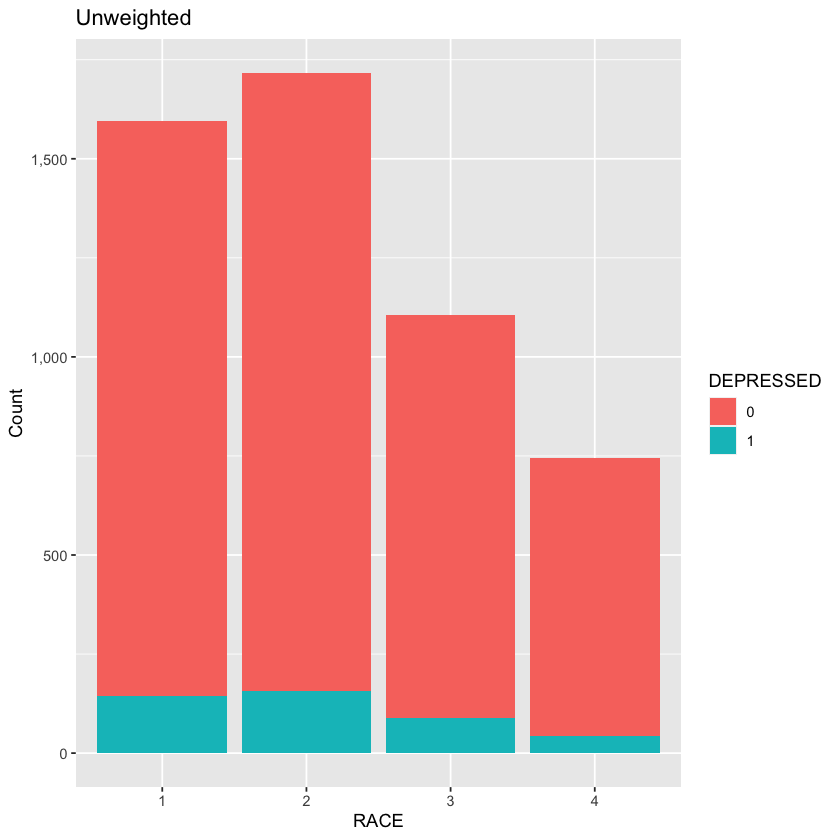

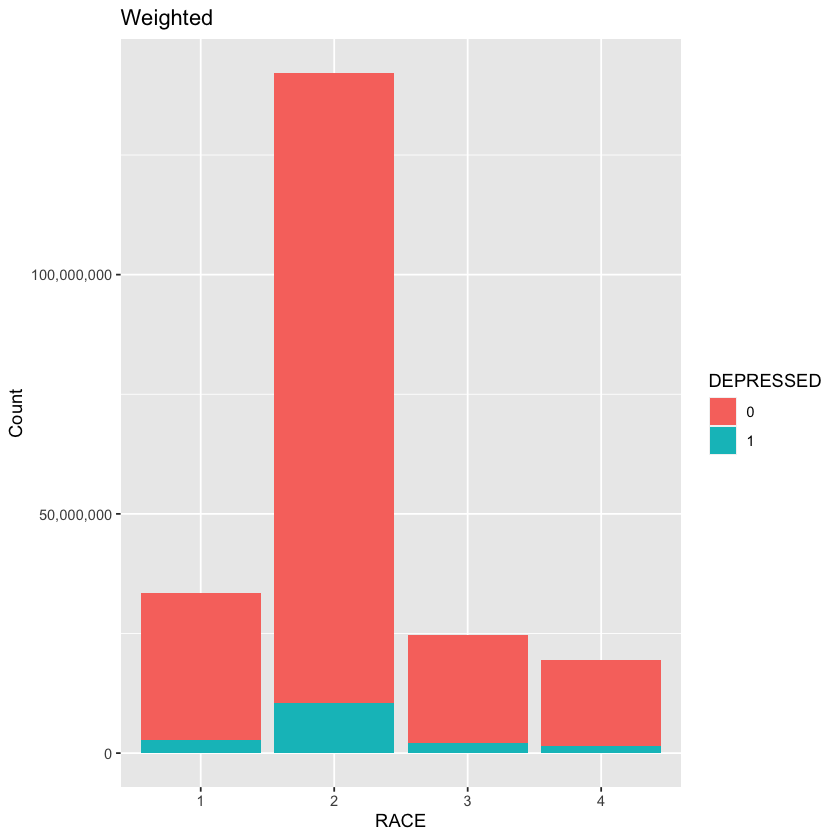

In [229]:
# Display weight charts for RACE
get_graph('RACE', tables$unweight, tables$weight)

In [230]:
# Display chi square test for GENDER
tables = getTables('GENDER')

# Display the unweighted table
print('GENDER Chi Square Test')
print(tables$unweight)
    
# Chi square test
print(summary(tables$weight, statistic = "Chisq"))

[1] "GENDER Chi Square Test"
      0    1
            
1  2349  174
2  2381  258
      DEPRESSED
GENDER         0         1
     1 100850792   6049836
     2 102208488  10582586

	Pearson's X^2: Rao & Scott adjustment

data:  svychisq(~GENDER + DEPRESSED, design = merergeddatadesign, statistic = "Chisq")
X-squared = 25.546, df = 1, p-value = 0.00002623



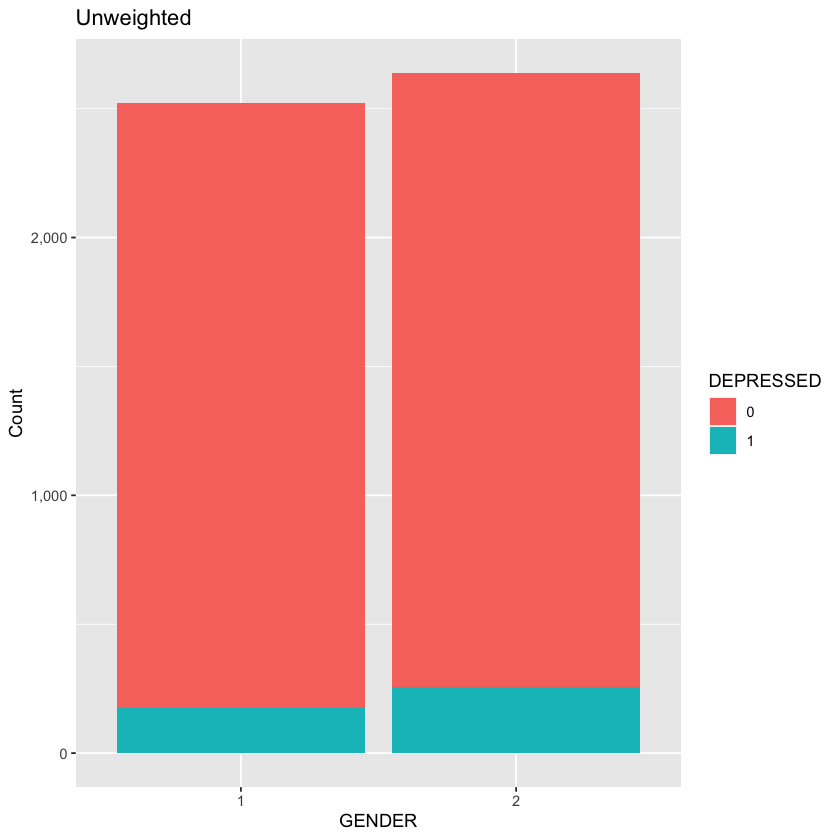

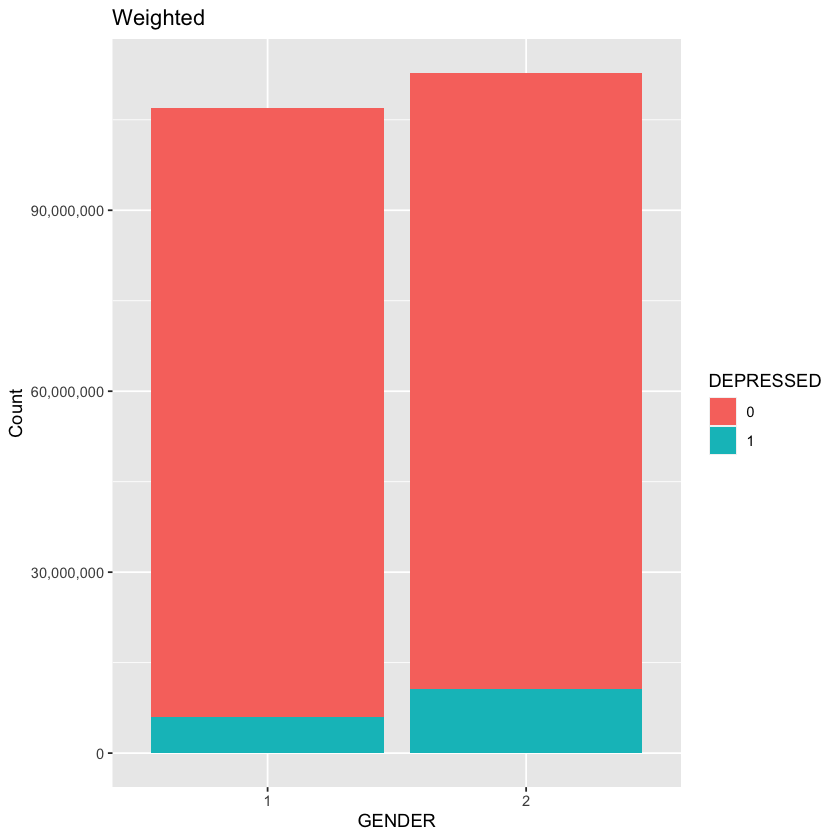

In [231]:
# Display weight charts for GENDER
get_graph('GENDER', tables$unweight, tables$weight)

In [232]:
# Display chi square test for AGEGRP
tables = getTables('AGEGRP')

# Display the unweighted table
print('AGEGRP Chi Square Test')
print(tables$unweight)
    
# Chi square test
print(summary(tables$weight, statistic = "Chisq"))

[1] "AGEGRP Chi Square Test"
      0    1
            
1  2931  254
2  1799  178
      DEPRESSED
AGEGRP         0         1
     1 132057223  10921227
     2  71002057   5711196

	Pearson's X^2: Rao & Scott adjustment

data:  svychisq(~AGEGRP + DEPRESSED, design = merergeddatadesign, statistic = "Chisq")
X-squared = 0.062776, df = 1, p-value = 0.8621



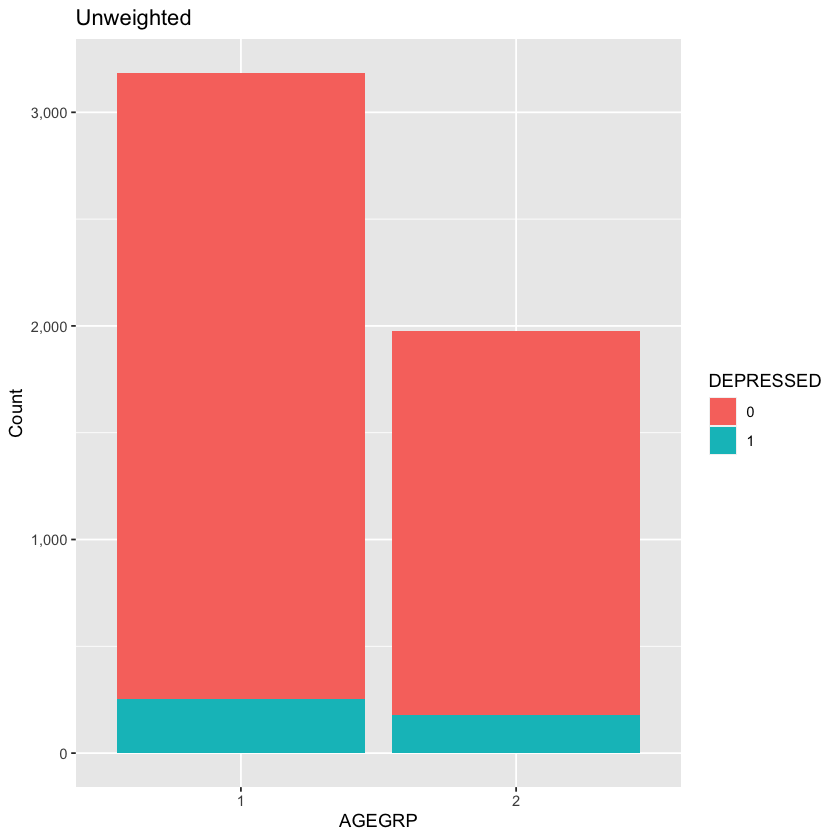

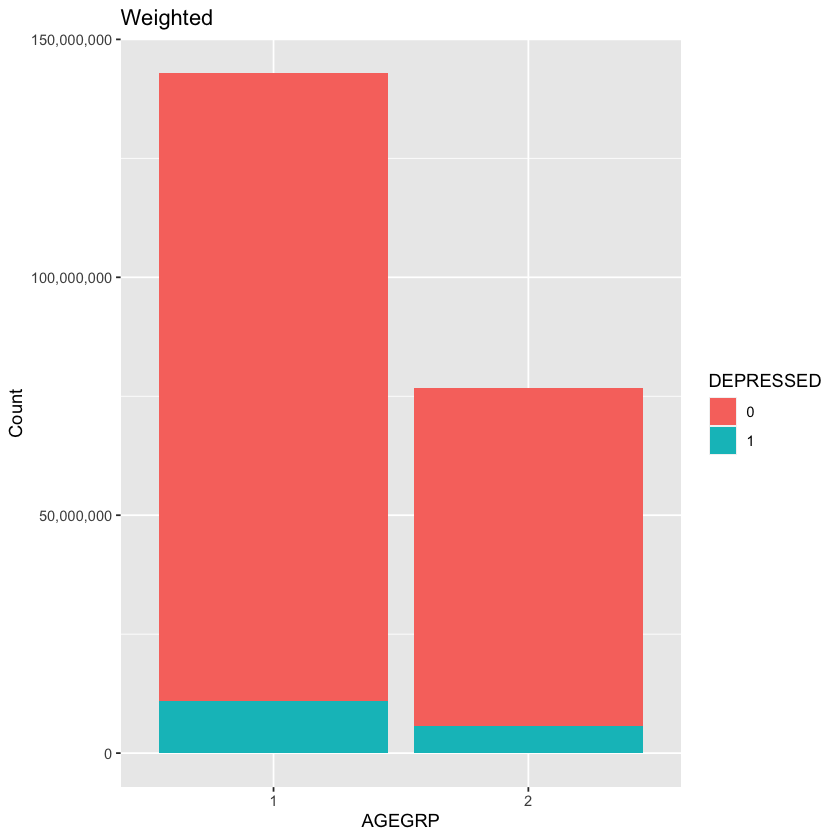

In [233]:
# Display weight charts for AGEGRP
get_graph('AGEGRP', tables$unweight, tables$weight)

In [234]:
# Display chi square test for EDUCATION
tables = getTables('EDUCATION')

# Display the unweighted table
print('EDUCATION Chi Square Test')
print(tables$unweight)
    
# Chi square test
print(summary(tables$weight, statistic = "Chisq"))

[1] "EDUCATION Chi Square Test"
      0    1
            
1  1057  143
2  1107  108
3  1399  131
4  1167   50
         DEPRESSED
EDUCATION        0        1
        1 27675163  3530044
        2 43460491  4302435
        3 66072930  5851696
        4 65850696  2948247

	Pearson's X^2: Rao & Scott adjustment

data:  svychisq(~EDUCATION + DEPRESSED, design = merergeddatadesign,     statistic = "Chisq")
X-squared = 43.688, df = 3, p-value = 0.00004421



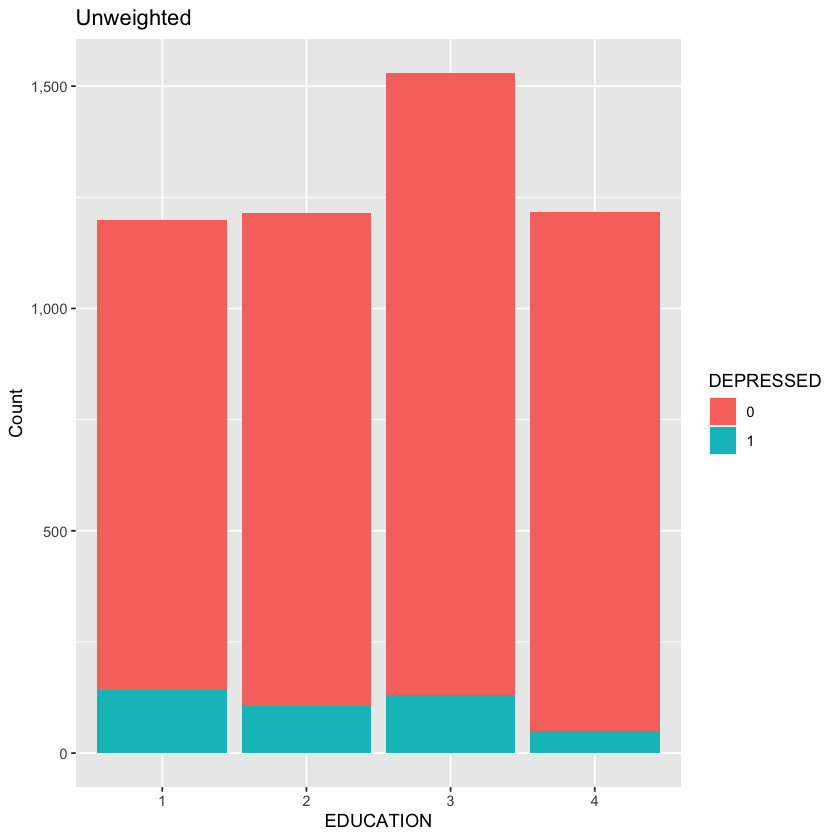

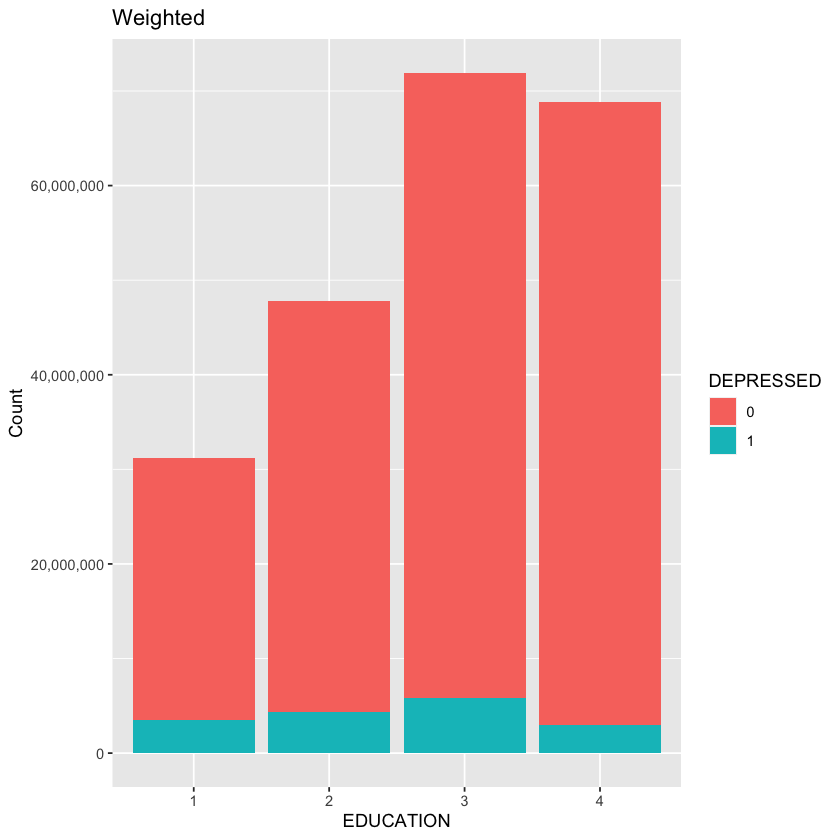

In [235]:
# Display weight charts for EDUCATION
get_graph('EDUCATION', tables$unweight, tables$weight)

In [236]:
# Display chi square test for MARITALSTATUS
tables = getTables('MARITALSTATUS')

# Display the unweighted table
print('MARITALSTATUS Chi Square Test')
print(tables$unweight)
    
# Chi square test
print(summary(tables$weight, statistic = "Chisq"))

[1] "MARITALSTATUS Chi Square Test"
      0    1
            
1  2333  141
2   934  129
3   797  105
4   666   57
             DEPRESSED
MARITALSTATUS         0         1
            1 111174658   5551591
            2  33867941   4852090
            3  33740768   3987727
            4  24275914   2241014

	Pearson's X^2: Rao & Scott adjustment

data:  svychisq(~MARITALSTATUS + DEPRESSED, design = merergeddatadesign,     statistic = "Chisq")
X-squared = 75.125, df = 3, p-value < 0.00000000000000022



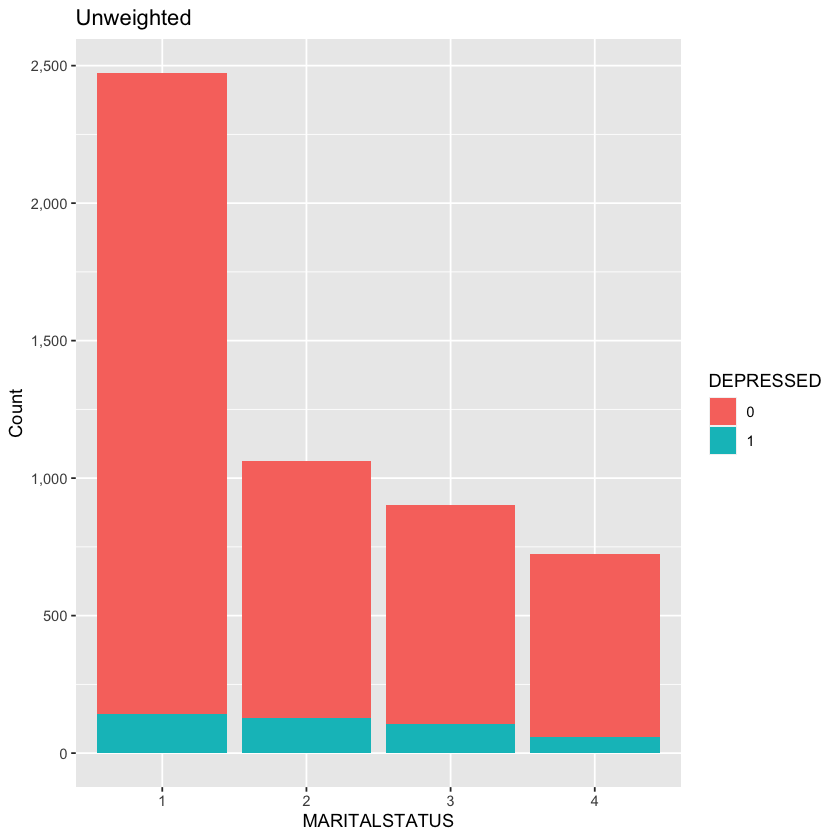

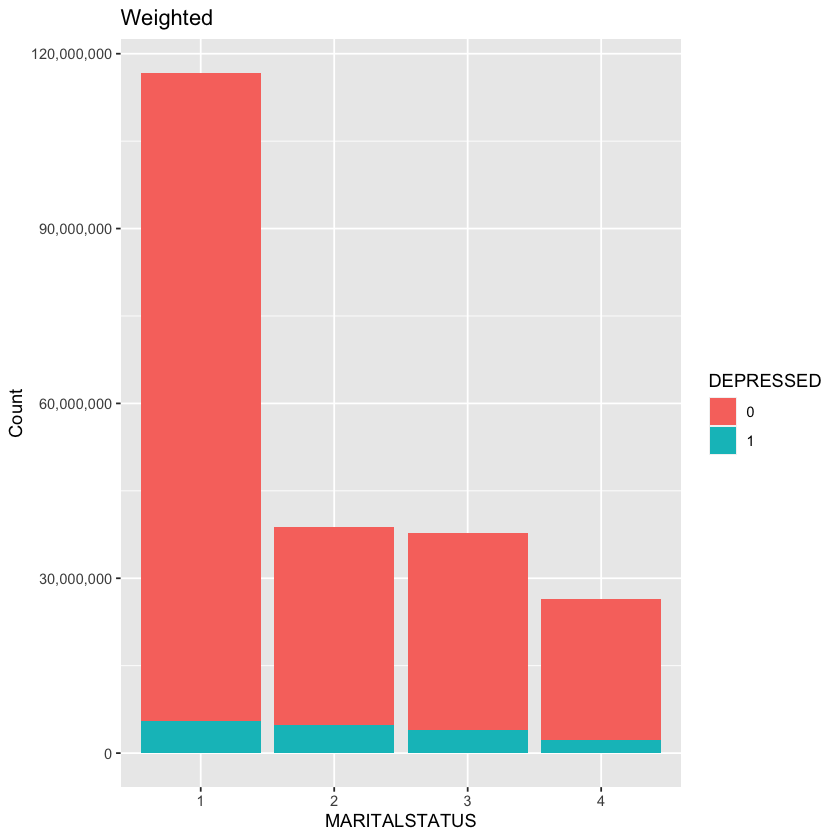

In [237]:
# Display weight charts for MARITALSTATUS
get_graph('MARITALSTATUS', tables$unweight, tables$weight)

In [238]:
# Display chi square test for PIR
tables = getTables('PIR')

# Display the unweighted table
print('PIR Chi Square Test')
print(tables$unweight)
    
# Chi square test
print(summary(tables$weight, statistic = "Chisq"))

[1] "PIR Chi Square Test"
      0    1
            
1  1863  259
2  2146  154
3   721   19
   DEPRESSED
PIR        0        1
  1 54060430  7930215
  2 96540812  6978407
  3 52458039  1723801

	Pearson's X^2: Rao & Scott adjustment

data:  svychisq(~PIR + DEPRESSED, design = merergeddatadesign, statistic = "Chisq")
X-squared = 94.2, df = 2, p-value = 0.0000000000318



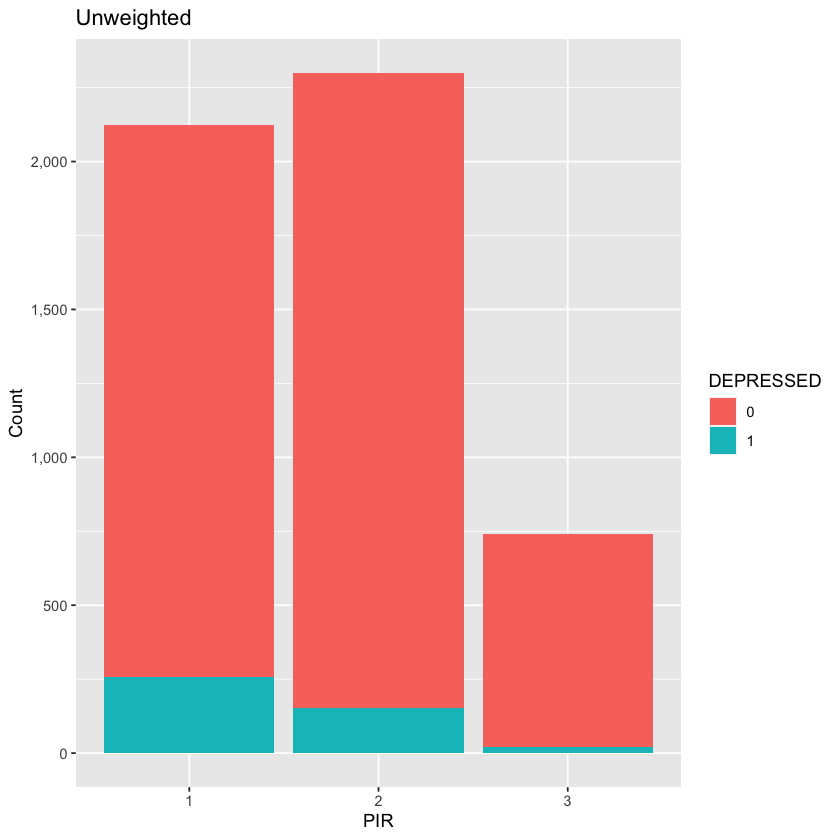

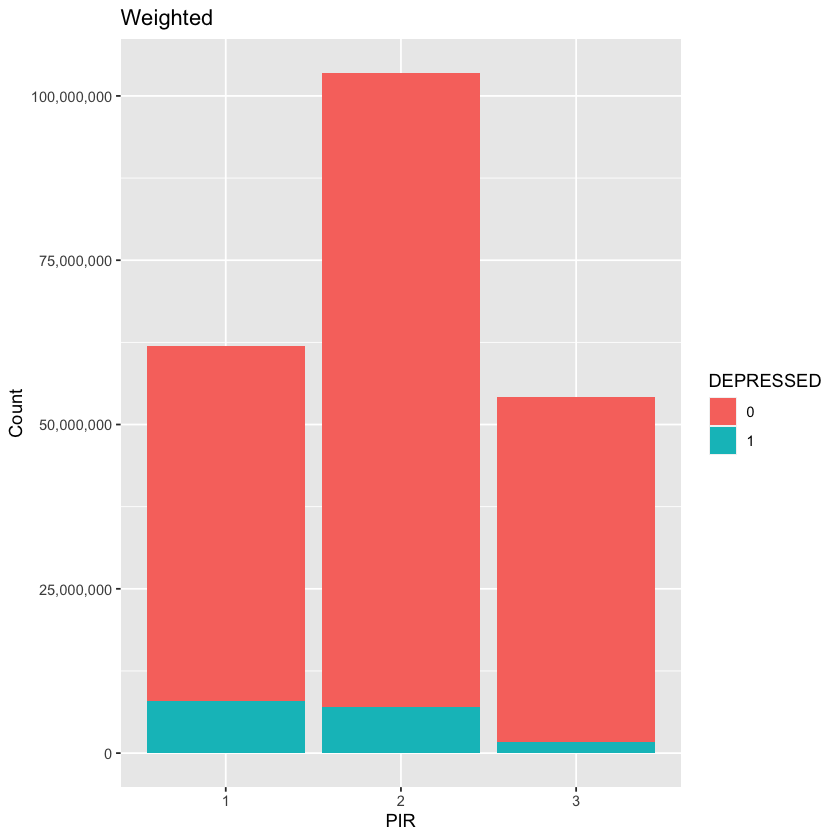

In [239]:
# Display weight charts for PIR
get_graph('PIR', tables$unweight, tables$weight)

In [240]:
# model <- glm(DEPRESSED ~ GENDER + EDUCATION + PIR + MARITALSTATUS, family = "binomial", data = mergeddata, weights = WTMEC2YR)
mergeddata$GENDER = as.factor(mergeddata$GENDER)
mergeddata$EDUCATION = as.factor(mergeddata$EDUCATION)
mergeddata$PIR = as.factor(mergeddata$PIR)
mergeddata$MARITALSTATUS = as.factor(mergeddata$MARITALSTATUS)

mergeddata$GENDER = relevel(mergeddata$GENDER, 1)
mergeddata$EDUCATION = relevel(mergeddata$EDUCATION, 4)
mergeddata$PIR = relevel(mergeddata$PIR, 3)
mergeddata$MARITALSTATUS = relevel(mergeddata$MARITALSTATUS, 4)


# Poisson regression is useful when predicting an outcome variable representing counts from a set of continuous predictor variables.
# If you have overdispersion (see if residual deviance is much larger than degrees of freedom), you may want to use quasipoisson() instead of poisson().
# https://www.statmethods.net/advstats/glm.html
model <- glm(DEPRESSED ~ GENDER + EDUCATION + PIR + MARITALSTATUS, data = mergeddata, weights = WTMEC2YR, family = quasipoisson())
summary(model)


Call:
glm(formula = DEPRESSED ~ GENDER + EDUCATION + PIR + MARITALSTATUS, 
    family = quasipoisson(), data = mergeddata, weights = WTMEC2YR)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-258.47   -86.40   -63.01   -44.01  1129.87  

Coefficients:
               Estimate Std. Error t value             Pr(>|t|)    
(Intercept)     -3.6968     0.2224 -16.622 < 0.0000000000000002 ***
GENDER2          0.4229     0.1030   4.105          0.000040976 ***
EDUCATION1       0.4875     0.1690   2.884              0.00394 ** 
EDUCATION2       0.3920     0.1568   2.500              0.01245 *  
EDUCATION3       0.3251     0.1469   2.214              0.02689 *  
PIR1             0.9653     0.1811   5.330          0.000000103 ***
PIR2             0.5098     0.1744   2.922              0.00349 ** 
MARITALSTATUS1  -0.3324     0.1600  -2.077              0.03781 *  
MARITALSTATUS2   0.3009     0.1615   1.863              0.06254 .  
MARITALSTATUS3   0.2778     0.1664   1.670     

In [241]:
# odds ratios only
exp(coef(model))

## odds ratios and 95% CI
exp(cbind('Odds Ratio' = coef(model), confint.default(model, level = 0.95)))

(Intercept)        GENDER2     EDUCATION1     EDUCATION2     EDUCATION3 
    0.02480282     1.52643425     1.62823915     1.47988706     1.38421195 
          PIR1           PIR2 MARITALSTATUS1 MARITALSTATUS2 MARITALSTATUS3 
    2.62569694     1.66492507     0.71719510     1.35105516     1.32028699

,Odds Ratio,2.5 %,97.5 %
(Intercept),0.02480282,0.01603968,0.03835362
GENDER2,1.52643425,1.24735307,1.86795670
EDUCATION1,1.62823915,1.16903196,2.26782742
EDUCATION2,1.47988706,1.08836770,2.01224798
EDUCATION3,1.38421195,1.03796969,1.84595249
PIR1,2.62569694,1.84105000,3.74475674
PIR2,1.66492507,1.18281406,2.34354290
MARITALSTATUS1,0.71719510,0.52413024,0.98137595
MARITALSTATUS2,1.35105516,0.98443447,1.85421183
MARITALSTATUS3,1.32028699,0.95283063,1.82945184
